In [1]:
import os
import pickle
import random
from PIL import Image
import cv2
import numpy as np
import matplotlib.pyplot as plt
from tqdm.notebook import tqdm
os.chdir('../scripts/.')
from tf_od_utils import visualization_utils as vis_util

In [2]:
testset_eval_results = '../processed-data/exported_graphs_fastercnn_194758/val_set_eval_results.pickle'
labels_path = '../processed-data/labels.txt'
images_dir = '../processed-data/images/'
savedir = '../processed-data/exported_graphs_fastercnn_194758/val_image'
box_thresh = 0.6

In [3]:
def get_labels_per_line(file_path):
    with open(file_path) as f:
        labels = f.readlines()
        labels = [l.strip() for l in labels]
        return labels

In [4]:
def show_results(idx,eval_result_list):
    row = eval_result_list[idx]
    img_path = os.path.join(images_dir, row[0]+'.jpg')
    ground_truth = [idx_to_label[i] for i in row[1]]
    prediction_class = row[2]['detection_classes'][0].astype(np.uint16)
    prediction_score = row[2]['detection_scores'][0]
    prediction_box = row[2]['detection_boxes'][0]
    prediction = [(class_name, score, list(box)) for class_name, score, box in zip(prediction_class, prediction_score, prediction_box) if score>box_thresh]
    print('Ground Truth: ', ground_truth)
    print('Prediction: ', prediction)
    
    # Image Draw and show
    img = cv2.imread(img_path)
    img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
    img = vis_util.visualize_boxes_and_labels_on_image_array(
            img,
            prediction_box,
            prediction_class,
            prediction_score,
            category_index,
            max_boxes_to_draw=None,
            min_score_thresh=box_thresh,
            instance_masks=None,
            use_normalized_coordinates=True,
            line_thickness=5)
        
    img = Image.fromarray(img)
    #img.save()
    plt.figure(figsize=(15,15))
    plt.imshow(img)

In [5]:
labels = get_labels_per_line(labels_path)
labels.insert(0, 'Background')
total_classes = len(labels)
print('Total classes', total_classes)
idx_to_label = { k:v for k,v in enumerate(labels)}
idx_to_label

Total classes 2


{0: 'Background', 1: 'Text'}

In [6]:
category_index = { k:{'name': v, 'id': k} for k,v in idx_to_label.items()}
category_index

{0: {'id': 0, 'name': 'Background'}, 1: {'id': 1, 'name': 'Text'}}

In [7]:
eval_result_list = pickle.load(open(testset_eval_results,'rb'))
len(eval_result_list)

40

## Running last cell everytime will display a random result 

Ground Truth:  ['Text']
Prediction:  [(1, 0.99999976, [0.92002678, 0.0, 0.97558993, 1.0])]


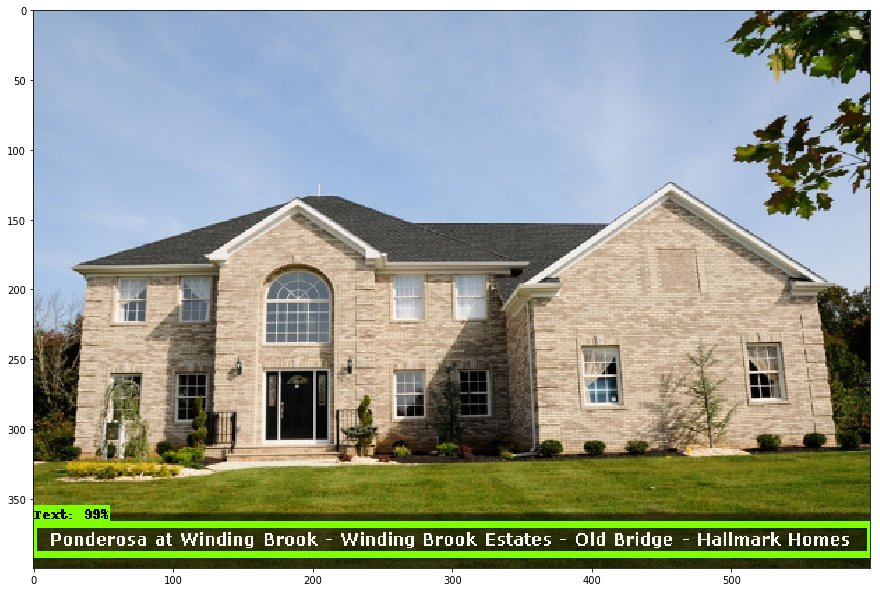

In [8]:
idx = 0#random.randint(0,len(eval_result_list)-1)
show_results(idx,eval_result_list)

In [9]:
idx = -1

0
Ground Truth:  ['Text']
Prediction:  [(1, 0.99999976, [0.92002678, 0.0, 0.97558993, 1.0])]


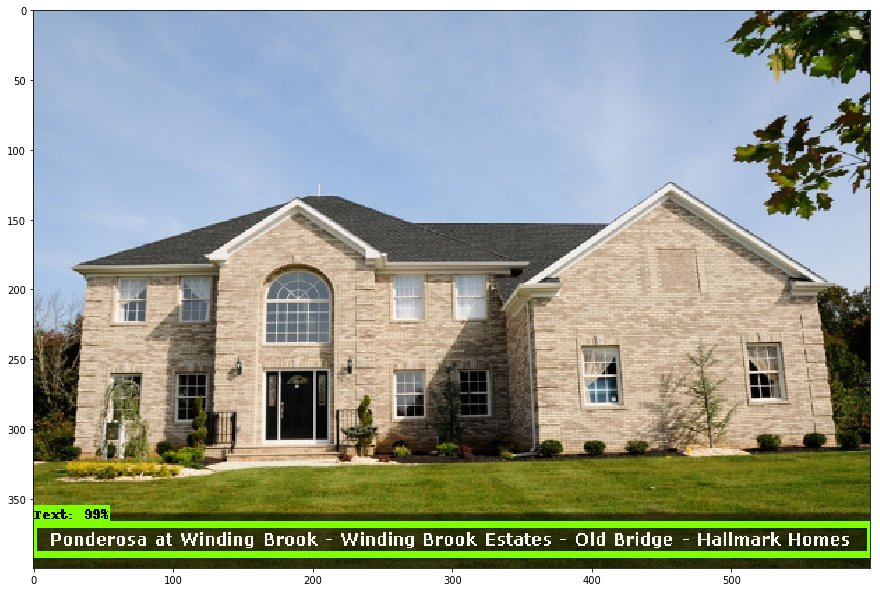

In [10]:
idx += 1
print(idx)
show_results(idx,eval_result_list)

### Draw and save images

In [11]:
def save_results(idx,eval_result_list,savedir):
    row = eval_result_list[idx]
    img_path = os.path.join(images_dir, row[0]+'.jpg')
    imgsavepath = os.path.join(savedir, os.path.basename(img_path))
    prediction_class = row[2]['detection_classes'][0].astype(np.uint16)
    prediction_score = row[2]['detection_scores'][0]
    prediction_box = row[2]['detection_boxes'][0]
    
    
    # Image Draw and save
    try:    
        img = cv2.imread(img_path)
        img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
        img = vis_util.visualize_boxes_and_labels_on_image_array(
                img,
                prediction_box,
                prediction_class,
                prediction_score,
                category_index,
                max_boxes_to_draw=None,
                min_score_thresh=box_thresh,
                instance_masks=None,
                use_normalized_coordinates=True,
                line_thickness=5)

        img = Image.fromarray(img)
        img.save(imgsavepath)
        print('Saved at: ', imgsavepath)
    except Exception as e:
        print('Failed: ', imgsavepath, e)

In [12]:
if not os.path.exists(savedir):
    os.makedirs(savedir)
    for idx in tqdm(range(len(eval_result_list))):
        save_results(idx,eval_result_list,savedir)
else:
    print('Check Savedir Path!!!')

Saved at:  ../processed-data/exported_graphs_fastercnn_194758/val_image/9498133-150309.jpg
Saved at:  ../processed-data/exported_graphs_fastercnn_194758/val_image/15450561-150618.jpg
Saved at:  ../processed-data/exported_graphs_fastercnn_194758/val_image/7191007.jpg
Saved at:  ../processed-data/exported_graphs_fastercnn_194758/val_image/34273651-190514.jpg
Saved at:  ../processed-data/exported_graphs_fastercnn_194758/val_image/27035375-180409.jpg
Saved at:  ../processed-data/exported_graphs_fastercnn_194758/val_image/4636771.jpg
Saved at:  ../processed-data/exported_graphs_fastercnn_194758/val_image/32239191-191001.jpg
Saved at:  ../processed-data/exported_graphs_fastercnn_194758/val_image/28330059-180629.jpg
Saved at:  ../processed-data/exported_graphs_fastercnn_194758/val_image/5862218.jpg
Saved at:  ../processed-data/exported_graphs_fastercnn_194758/val_image/16096052-150909.jpg
Saved at:  ../processed-data/exported_graphs_fastercnn_194758/val_image/12421150.jpg
Saved at:  ../proces